# Предсказание принадлежности биологического вида к царству по частоте встречаемости кодонов в его ДНК

### Информация о датасете

Датасет представляет собой набор данных о частоте использования кодонов в геномной кодирующей ДНК большой выборки различных организмов из разных таксонов, занесенных в таблицу в базе данных CUTG https://www.kazusa.or.jp/codon/

### Импорт

In [4]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline     
import pandas as pd             
import seaborn as sns

### Описание

Предположим, мы обнаружили биологические следы живого организма и хотим определить к какому царству он принадлежит по строению цепочки ДНК.

In [5]:
path = 'codon_usage.csv'
raw_data = pd.read_csv(path, low_memory=False)

### Размерность

In [6]:
raw_data.shape

(13028, 69)

Датасет содержит **13028** строк и **69** столбцов.

Начало таблицы

In [7]:
raw_data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [8]:
raw_data.index

RangeIndex(start=0, stop=13028, step=1)

### Обзор столбцов

In [9]:
raw_data.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

Найдём уникальные значения в толбце Kingdom

In [10]:
unique_values = raw_data.Kingdom.unique()
print(f"Уникальные значения в столбце Kingdom: {unique_values}\nКоличество уникальных значений: {unique_values.size}")

Уникальные значения в столбце Kingdom: ['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
Количество уникальных значений: 11


**Вывод**: датасет содержит 11 классов

### Описание столбцов
- **Kingdom** - царство, код из трёх букв вида: xxx (arc - археи, bct - бактерии, plm - плазмиды, inv - беспозвоночные, mam - млекопитающие, pln - растения, pri - приматы, rod - грызуны, vrt - позвоночные, phg - бактериофаги, vrl - вирусы)
- **DNAType** - тип ДНК, обозначается целым числом для геномного состава вида: 0 - геномный, 1 - митохондриальный, 2 - хлоропласт, 3 - цианелла, 4 - пластида, 5 - нуклеоморф, 6 - вторичный эндосимбионт, 7 - хромопласт, 8 - лейкопласт, 9 - значение недоступно, 10 - пропластид, 11 - апикопласт и 12 - кинетопласт.
- **SpeciesID** - целое число, уникальный идентификатор вида
- **Ncodons** - число кодонов представляет собой алгебраическую сумму чисел, перечисленных для различных кодонов. Частоты кодонов нормализованы к общему количеству кодонов, поэтому количество появлений, разделенное на «Ncodons», представляет собой частоты кодонов, перечисленные в файле данных. 
- **SpeciesName** - название вида представлено в виде строк. Это описательная метка для интерпретации данных. 
- **UUU, UUC, UUA ... UGA** - частоты кодонов, представлены числами с плавающей запятой (точность 5 знаков)

Требуется определить принадлежность вида к определённому царству по частоте встречаемости кодонов в его ДНК.

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Тип данных для столбцов UUU и UUC был определён неверно, выясним причину (найдём недействительные значения)

In [12]:
pd.isnull((raw_data[["UUU", "UUC"]].apply(pd.to_numeric, errors = 'coerce'))).sum()

UUU    2
UUC    1
dtype: int64

В столбцах UUU и UUC содержатся нечисловые значения(ошибки в данных), что не позволяет библиотеке Pandas однозначно определить тип данных.

Найдём и заменим недействительные значения.

In [13]:
def invalid_to_nan(data, columnIndex):
    for index, value in data[columnIndex].items():
        try:
            float(value)            
        except ValueError:
            print(f"column: {columnIndex} index: {index}, value: {value}")
            data.loc[index, columnIndex] = np.nan

In [14]:
data = raw_data.copy()

invalid_to_nan(data, "UUU")
invalid_to_nan(data, "UUC")

column: UUU index: 486, value: non-B hepatitis virus
column: UUU index: 5063, value: 12;I
column: UUC index: 5063, value: -


Приведём столбцы к корректным типам данных.

In [15]:
data['UUU'] = data['UUU'].astype('float64')
data['UUC'] = data['UUC'].astype('float64')
data['Kingdom'] = data['Kingdom'].astype('category')

Результат преобразований:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Kingdom      13028 non-null  category
 1   DNAtype      13028 non-null  int64   
 2   SpeciesID    13028 non-null  int64   
 3   Ncodons      13028 non-null  int64   
 4   SpeciesName  13028 non-null  object  
 5   UUU          13026 non-null  float64 
 6   UUC          13027 non-null  float64 
 7   UUA          13028 non-null  float64 
 8   UUG          13028 non-null  float64 
 9   CUU          13028 non-null  float64 
 10  CUC          13028 non-null  float64 
 11  CUA          13028 non-null  float64 
 12  CUG          13028 non-null  float64 
 13  AUU          13028 non-null  float64 
 14  AUC          13028 non-null  float64 
 15  AUA          13028 non-null  float64 
 16  AUG          13028 non-null  float64 
 17  GUU          13028 non-null  float64 
 18  GUC          13028 non-nul

Удалим пропущенные значения.

In [17]:
data.dropna(inplace=True)

### Анализ классов

In [18]:
data['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

<AxesSubplot:xlabel='Kingdom', ylabel='count'>

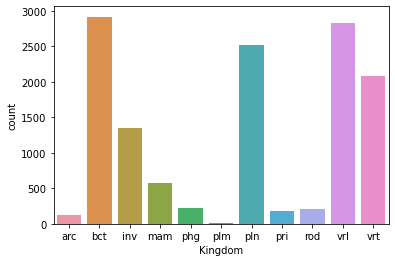

In [19]:
sns.countplot(x = data['Kingdom'])

Классы несбалансированны.

## Визуализация

In [20]:
data.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026.000000,13026.000000,1.302600e+04,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,0.367265,130443.036926,7.961776e+04,0.024818,0.023440,0.020637,0.014104,0.017821,0.018287,0.019045,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,0.688764,124777.067741,7.197556e+05,0.017628,0.011598,0.020710,0.009280,0.010587,0.014573,0.024252,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28851.250000,1.602000e+03,0.013910,0.015380,0.005610,0.007102,0.010890,0.007830,0.005302,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.929000e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222890.500000,9.120000e+03,0.031307,0.029210,0.029495,0.019807,0.022730,0.025110,0.017255,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031127,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


Выберем столбцы с числовыми значениями.

In [21]:
columns = [columnIndex for columnIndex in list(data) if data[columnIndex].dtype != object]

Построим гистограмму для каждого из столбцов.

<Figure size 1440x1440 with 0 Axes>

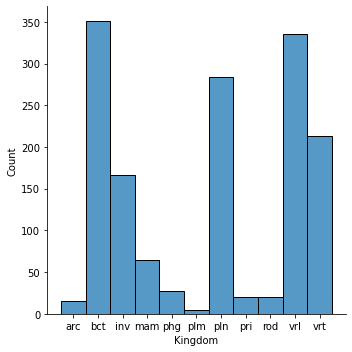

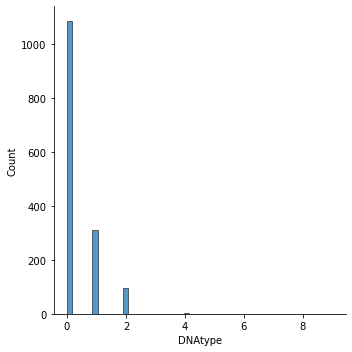

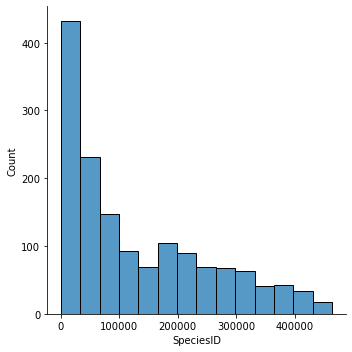

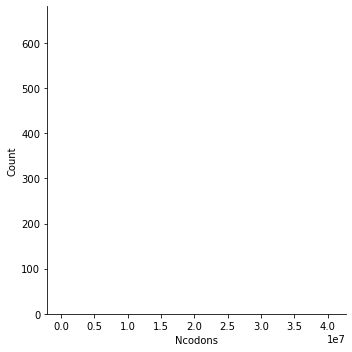

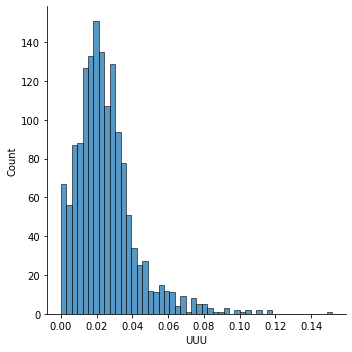

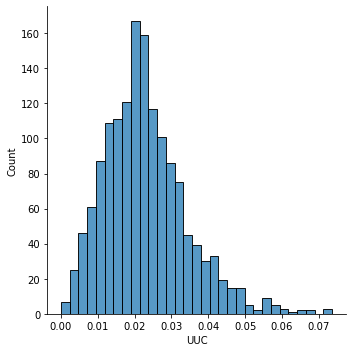

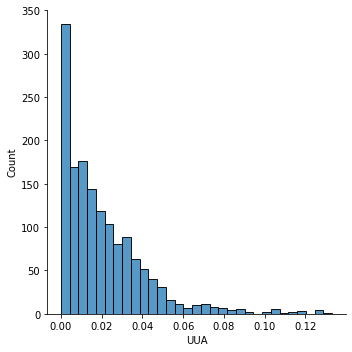

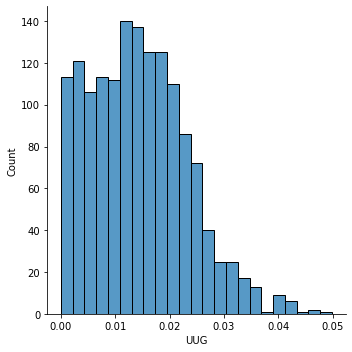

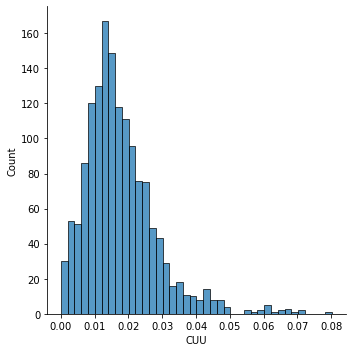

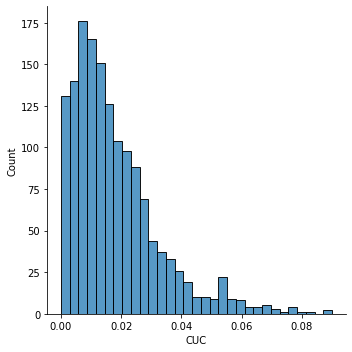

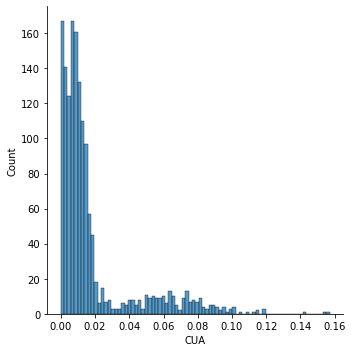

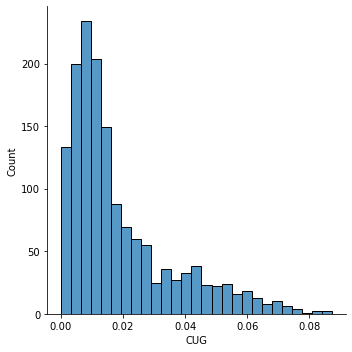

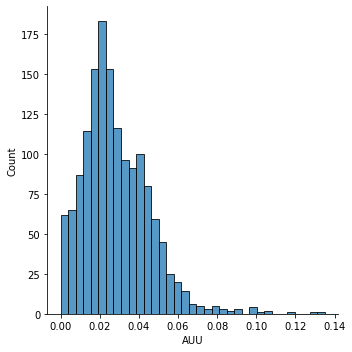

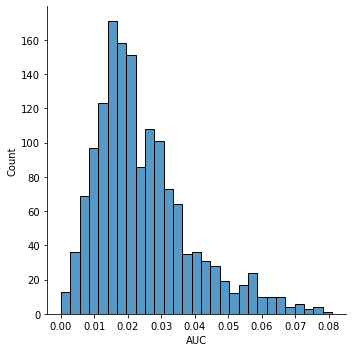

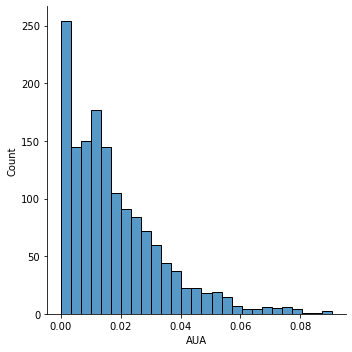

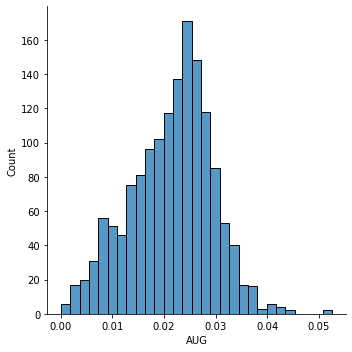

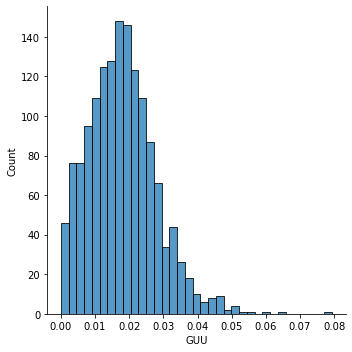

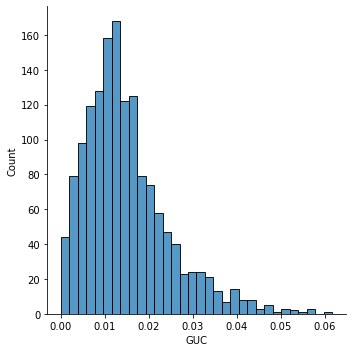

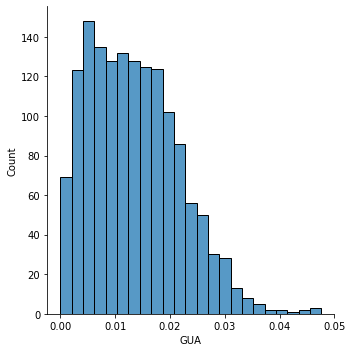

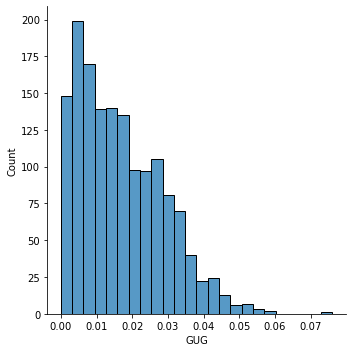

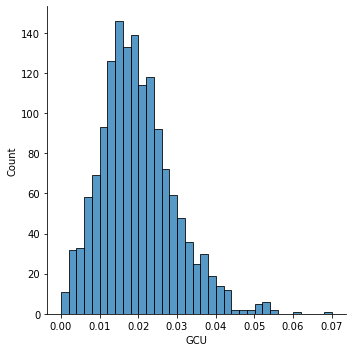

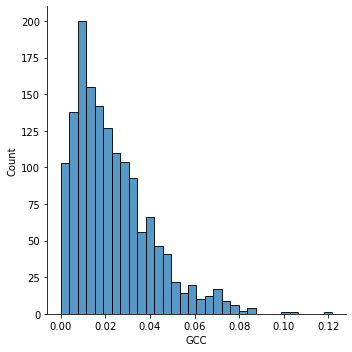

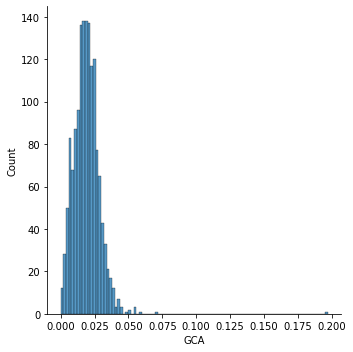

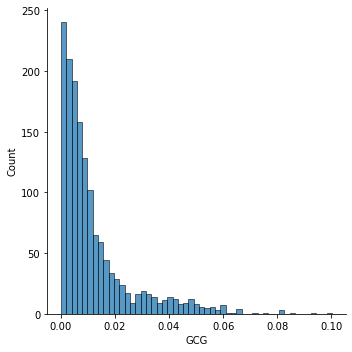

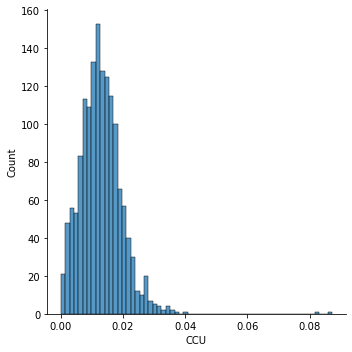

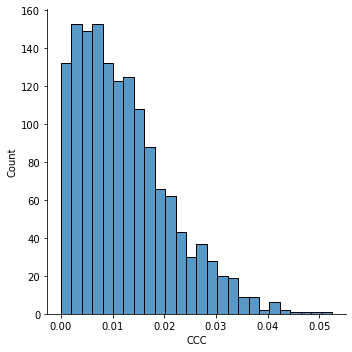

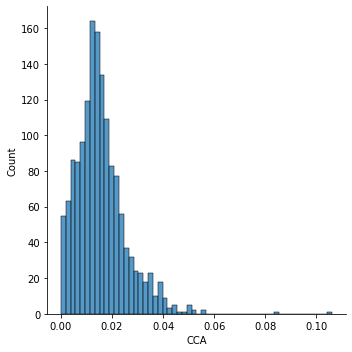

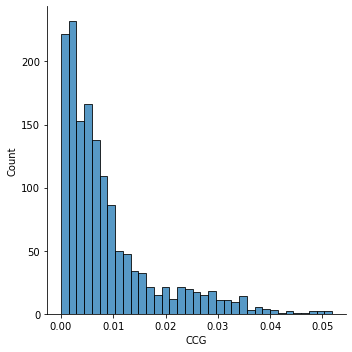

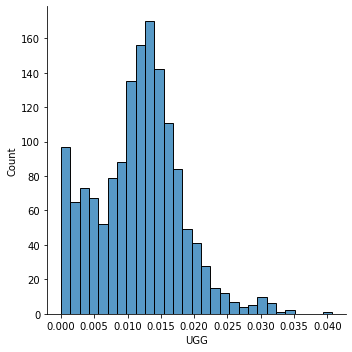

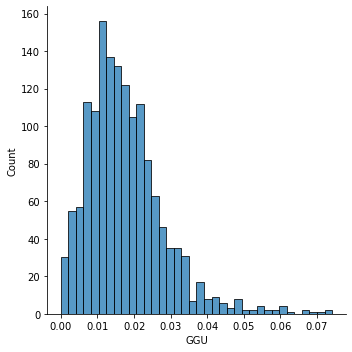

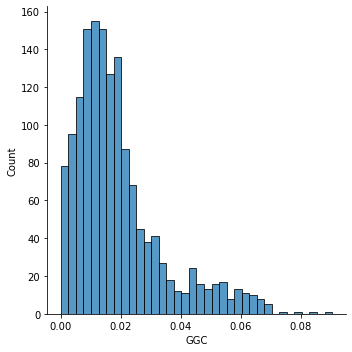

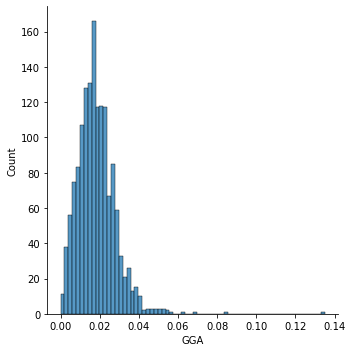

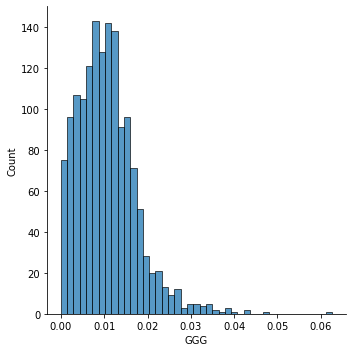

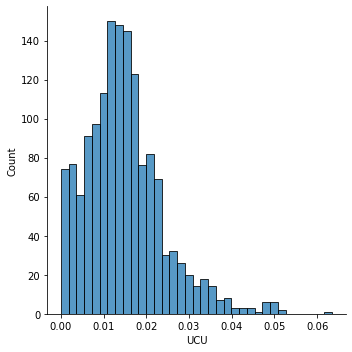

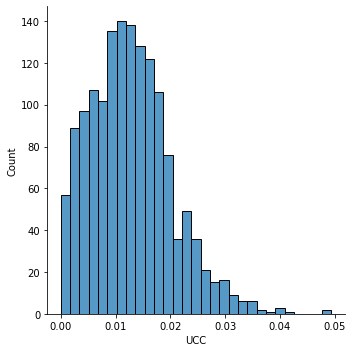

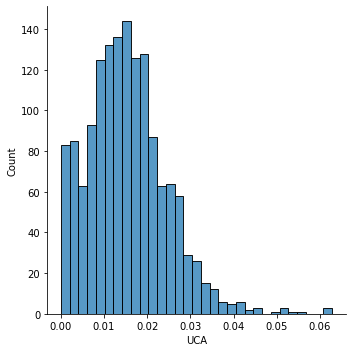

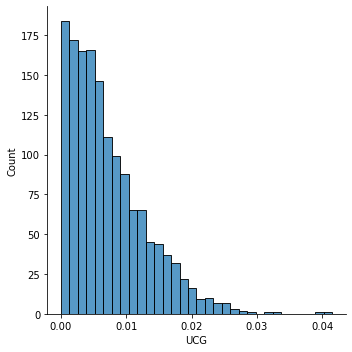

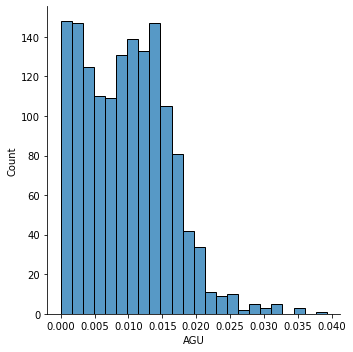

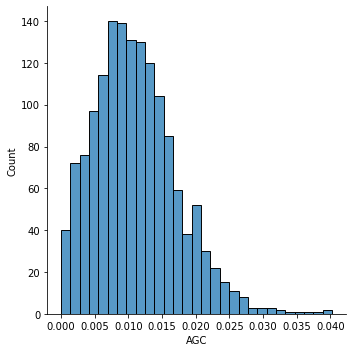

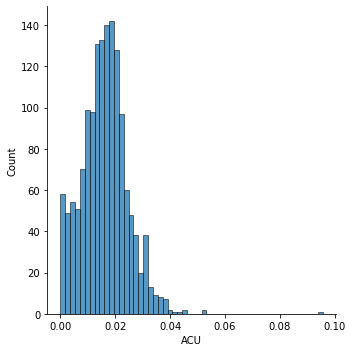

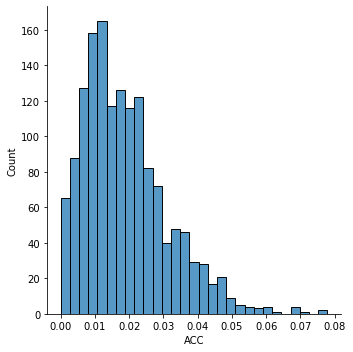

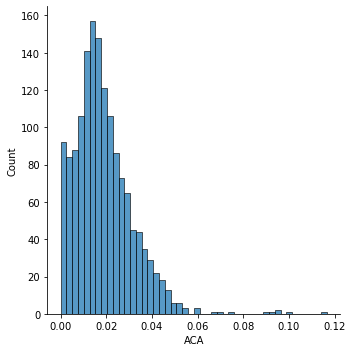

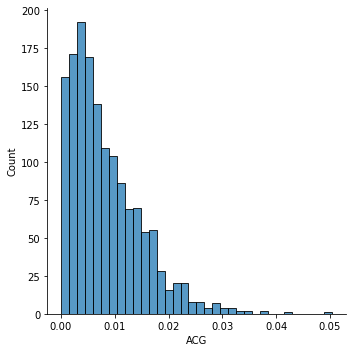

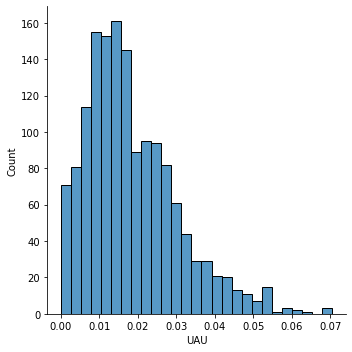

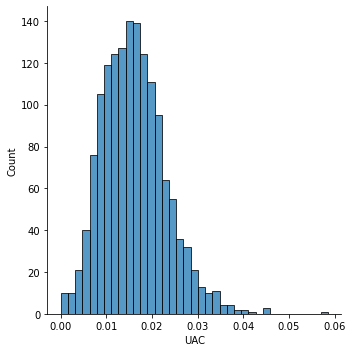

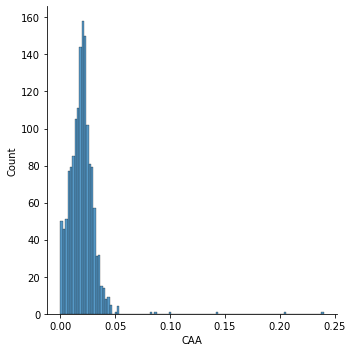

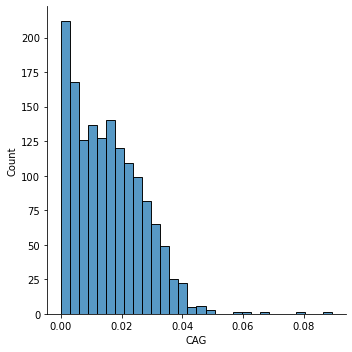

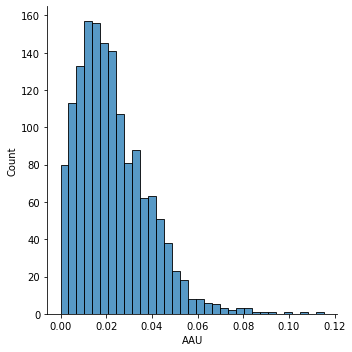

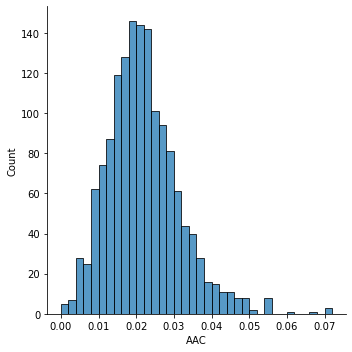

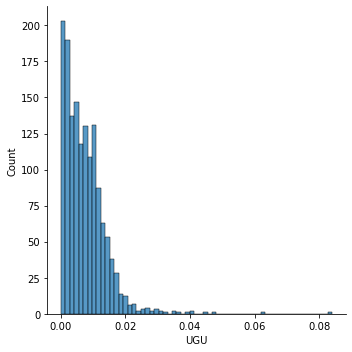

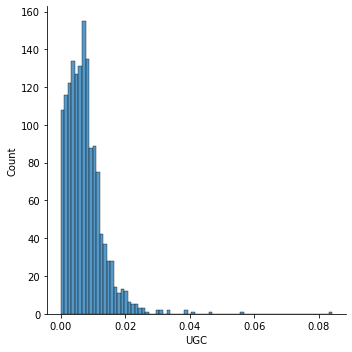

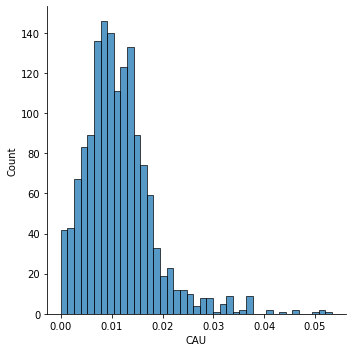

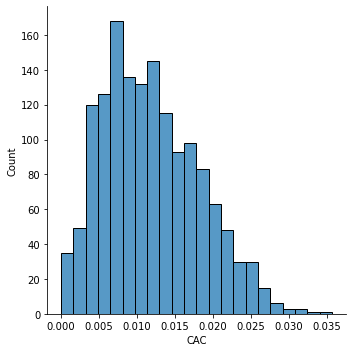

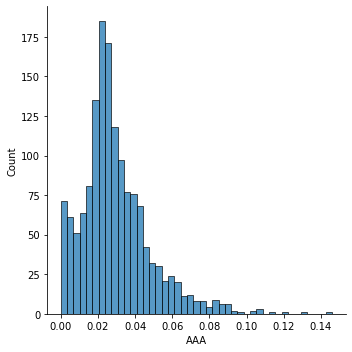

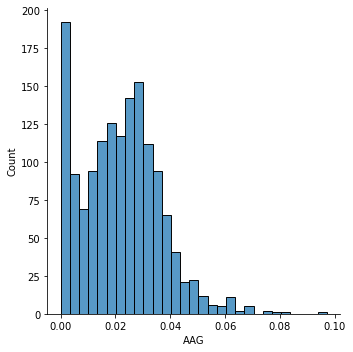

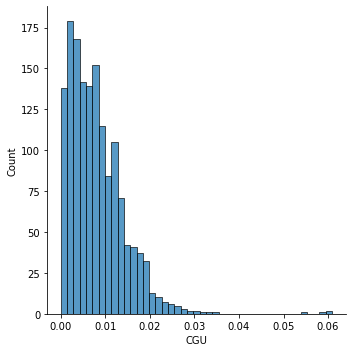

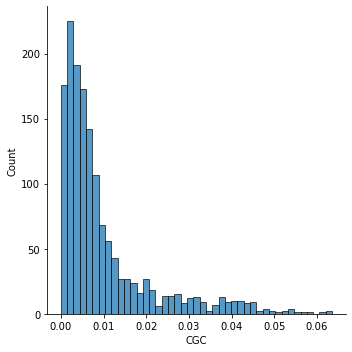

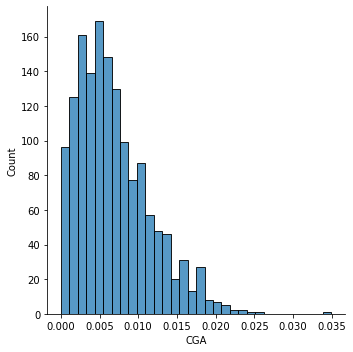

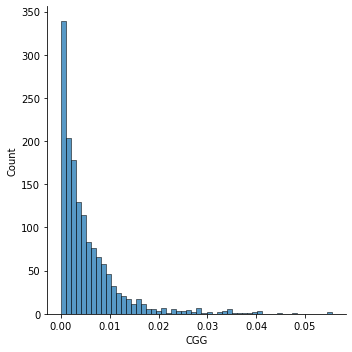

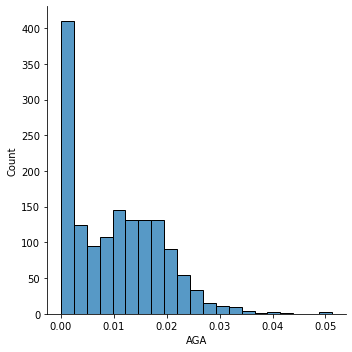

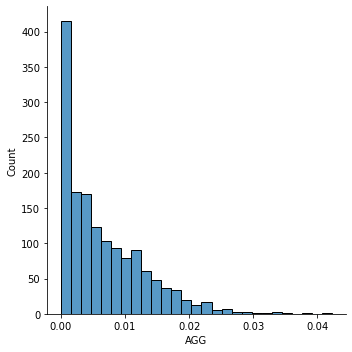

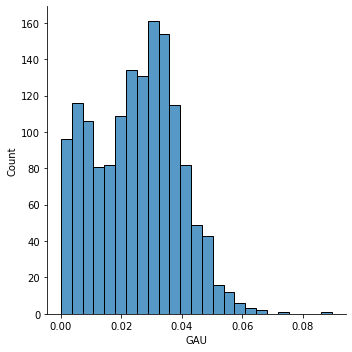

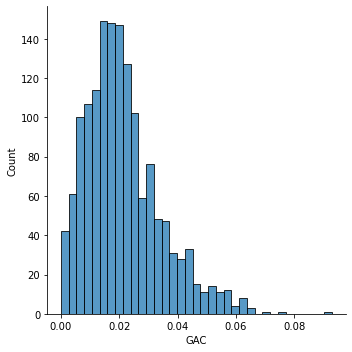

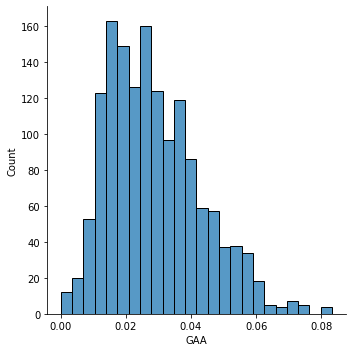

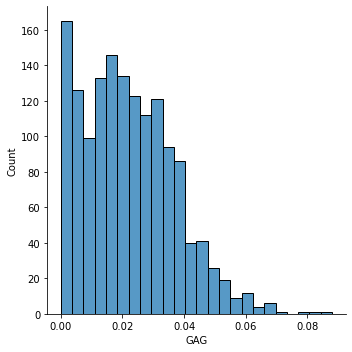

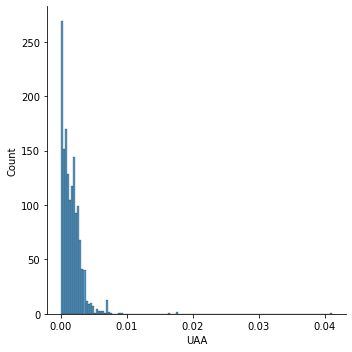

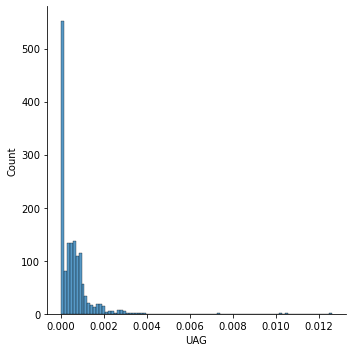

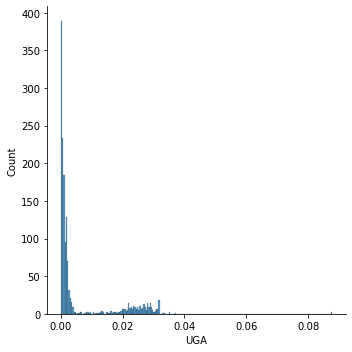

In [22]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1500, replace=False)

plt.figure(figsize = (20, 20))

for column in columns:
    sns.displot(data.iloc[random_subset][column])
    plt.show() 

Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [23]:
# !Работает очень медленно, не выдаёт результата
#sns.pairplot(data.iloc[random_subset], hue='Kingdom', diag_kind='hist')
#plt.legend()

Матрица корреляции

In [24]:
corr_mat = data.corr()
corr_mat

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,1.000000,-0.020640,-0.053879,0.456980,0.192249,0.460152,-0.039334,0.379466,0.067437,0.459086,...,-0.218565,-0.085942,-0.324659,-0.273814,-0.459354,-0.100704,-0.497575,0.127694,-0.029474,0.458548
SpeciesID,-0.020640,1.000000,0.051613,0.020128,-0.016753,0.025724,-0.047719,0.055947,0.022104,0.051161,...,0.011032,-0.026455,-0.000325,-0.005531,-0.028843,-0.014235,-0.079169,0.047551,-0.012775,0.050224
Ncodons,-0.053879,0.051613,1.000000,-0.035149,-0.028125,-0.033717,0.009490,-0.040632,-0.001748,-0.049958,...,0.068370,-0.011014,0.001487,0.024802,0.034606,0.028573,0.053025,-0.026614,0.003666,-0.047967
UUU,0.456980,0.020128,-0.035149,1.000000,-0.354082,0.761457,0.337784,0.312873,-0.433270,0.022340,...,-0.343592,0.303696,-0.104940,0.163590,-0.598978,0.154148,-0.452514,0.161928,0.008330,0.154603
UUC,0.192249,-0.016753,-0.028125,-0.354082,1.000000,-0.293159,-0.391935,0.035671,0.601362,0.485254,...,0.023974,-0.469387,-0.195680,-0.569606,0.198702,-0.464552,-0.079001,-0.014834,-0.046422,0.441262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.100704,-0.014235,0.028573,0.154148,-0.464552,0.188393,0.315429,-0.027955,-0.532901,-0.286736,...,-0.228076,0.476832,0.046406,0.684575,-0.218457,1.000000,-0.085183,0.077904,-0.019749,-0.401986
GAG,-0.497575,-0.079169,0.053025,-0.452514,-0.079001,-0.577687,0.115326,-0.430747,0.013362,-0.592600,...,0.524382,0.057028,0.477531,0.120198,0.673025,-0.085183,1.000000,-0.289654,0.004050,-0.582579
UAA,0.127694,0.047551,-0.026614,0.161928,-0.014834,0.263108,-0.131228,0.168447,0.014521,0.237438,...,-0.251603,0.020084,-0.157417,-0.067414,-0.292131,0.077904,-0.289654,1.000000,0.136464,0.276992
UAG,-0.029474,-0.012775,0.003666,0.008330,-0.046422,0.009545,0.053581,0.010373,-0.009295,-0.031165,...,-0.001665,0.050122,0.085691,-0.010064,-0.053819,-0.019749,0.004050,0.136464,1.000000,0.007000


<AxesSubplot:>

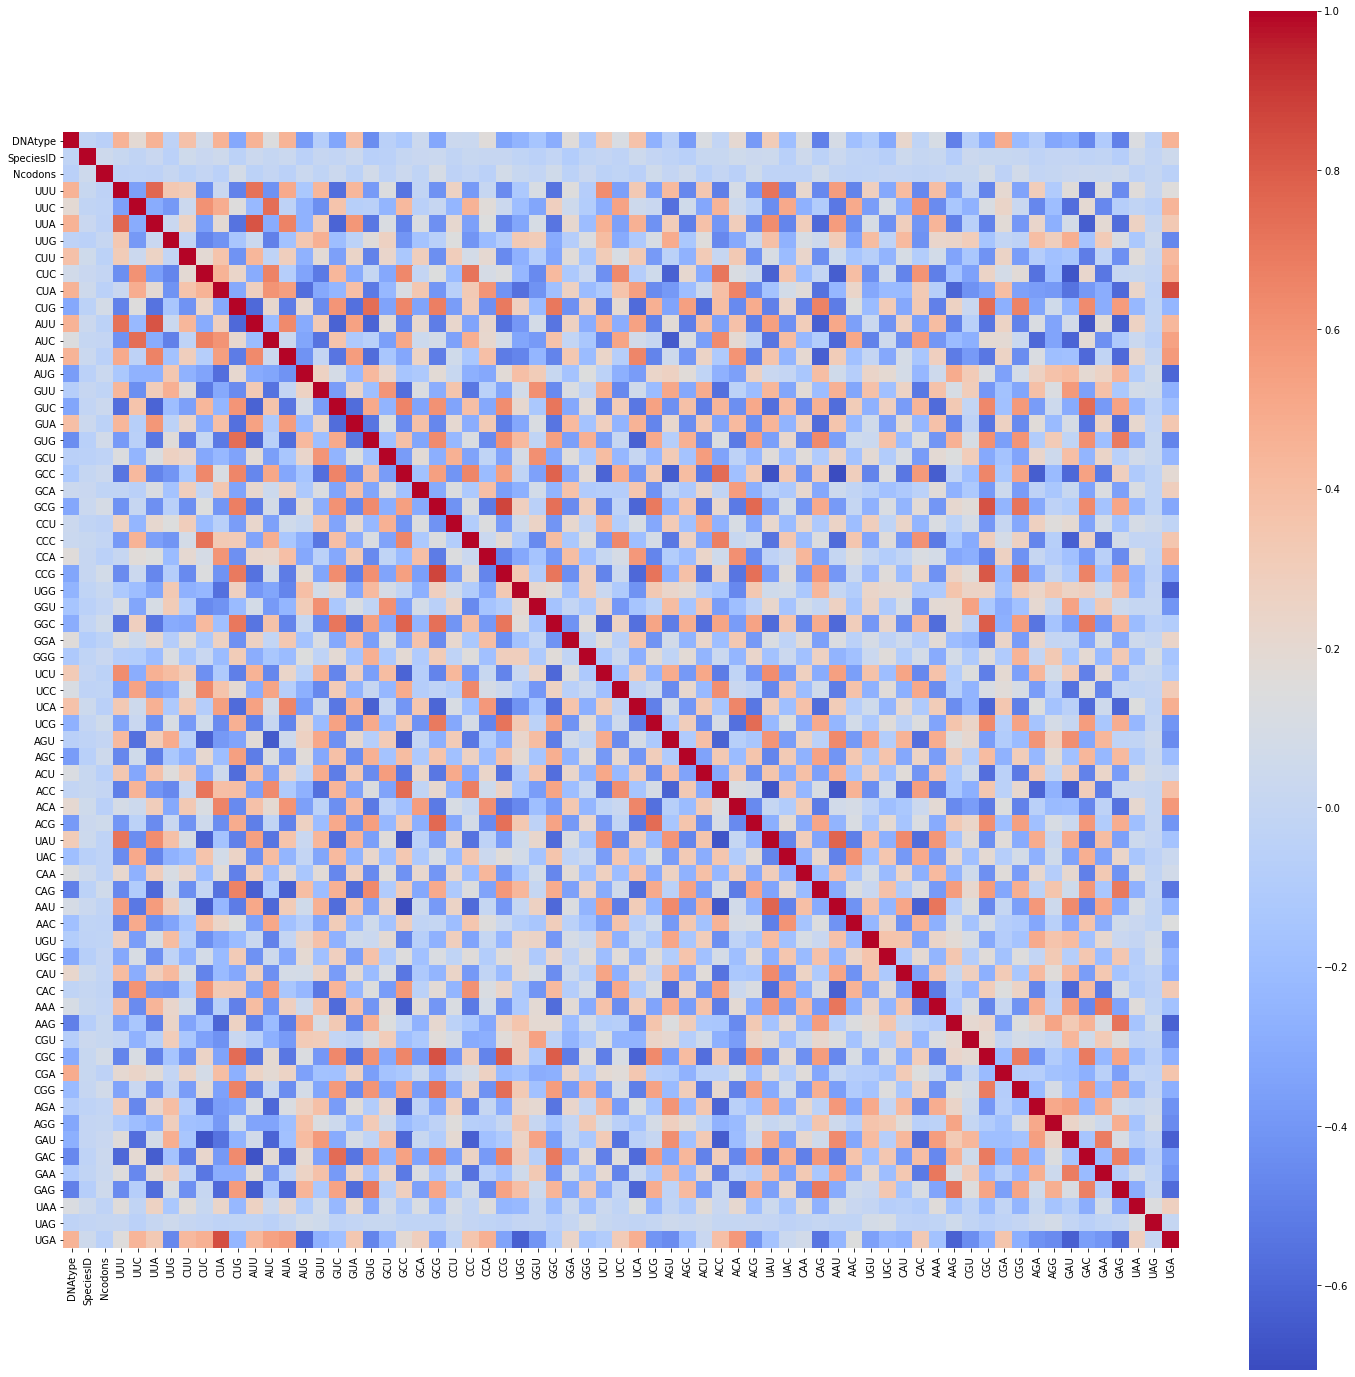

In [25]:
plt.figure(figsize = (25, 25))
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [26]:
corr_mat > 0.7

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SpeciesID,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ncodons,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UUU,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UUC,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
GAG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
UAA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
UAG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Наблюдается зависимость между различными видами кодонов. Такая корреляция нормальна для выбранной предметной области, имеет химическое обоснование. Явно дублирующие друг друга признаки отсутствуют.

## Нормализация количественных признаков

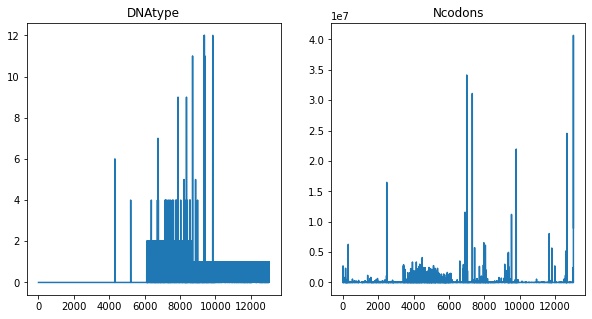

In [27]:
figure, axis = plt.subplots(1, 2, figsize=(10,5))

axis[0].plot(data.DNAtype)
axis[0].set_title("DNAtype")
  
axis[1].plot(data.Ncodons)
axis[1].set_title("Ncodons")

plt.show()

In [28]:
print(f'Максимальное значение в столбце DNAtype: {data.DNAtype.max()}')
print(f'Минимальное значение в столбце DNAtype: {data.DNAtype.min()}')
print('')
print(f'Максимальное значение в столбце Ncodons: {data.Ncodons.max()}')
print(f'Минимальное значение в столбце Ncodons: {data.Ncodons.min()}')

Максимальное значение в столбце DNAtype: 12
Минимальное значение в столбце DNAtype: 0

Максимальное значение в столбце Ncodons: 40662582
Минимальное значение в столбце Ncodons: 1000


Заметим, что в столбцах **DNAtype** и **Ncodons** диапозон значений достаточно велик. Имеет смысл их нормализовать.

In [29]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
normalized = min_max_scaler.fit_transform(data.loc[:,['DNAtype', 'Ncodons']].values)
data.loc[:,['DNAtype', 'Ncodons']] = normalized

In [30]:
display(data)

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.000000,100217,0.000024,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0.000000,100220,0.000012,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0.000000,100755,0.000095,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0.000000,100880,0.000023,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0.000000,100887,0.000537,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0.000000,9601,0.000002,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,0.083333,9601,0.000026,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,0.083333,9602,0.000017,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0.000000,9606,1.000000,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


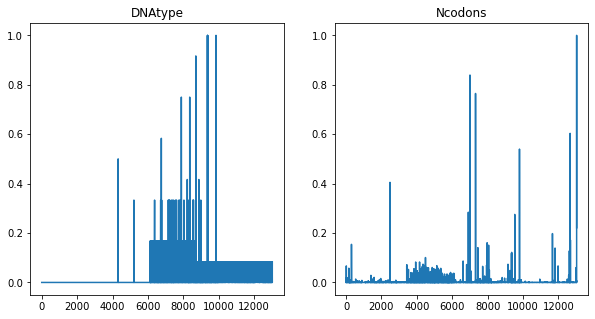

In [31]:
figure, axis = plt.subplots(1, 2, figsize=(10,5))

axis[0].plot(data.DNAtype)
axis[0].set_title("DNAtype")
  
axis[1].plot(data.Ncodons)
axis[1].set_title("Ncodons")

plt.show()

In [32]:
print(f'Максимальное значение в столбце DNAtype: {data.DNAtype.max()}')
print(f'Минимальное значение в столбце DNAtype: {data.DNAtype.min()}')
print('')
print(f'Максимальное значение в столбце Ncodons: {data.Ncodons.max()}')
print(f'Минимальное значение в столбце Ncodons: {data.Ncodons.min()}')

Максимальное значение в столбце DNAtype: 1.0
Минимальное значение в столбце DNAtype: 0.0

Максимальное значение в столбце Ncodons: 1.0
Минимальное значение в столбце Ncodons: 0.0


Проверяем, остались ли в датасете пропущенные значения

In [33]:
data.isna().sum().any()

False

Перед применением алгоритмов машинного обучения необходимо установить взаимно однозначное соответствие между строковыми значениями в столбце **Kingdom** и числами. Для этого пронумеруем классы от 0 до 10 и заменим значения.

In [34]:
class_map = {
    'vrl': 0, 
    'arc': 1,
    'bct': 2, 
    'phg': 3, 
    'plm': 4, 
    'pln': 5, 
    'inv': 6, 
    'vrt': 7, 
    'mam': 8, 
    'rod': 9,
    'pri': 10
}

In [35]:
data.Kingdom = data.Kingdom.map(class_map)

Результат преобразования:

In [36]:
data.head(5)

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.0,100217,0.000024,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,0.0,100220,0.000012,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,0.0,100755,0.000095,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,0.0,100880,0.000023,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,0.0,100887,0.000537,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Значения в столбцах **SpeciesName** и **SpeciesID** не представляют ценности и не будут использованы для обучения модели, поэтому избавимся от них.

In [37]:
data.drop(['SpeciesName', 'SpeciesID'], axis=1, inplace=True)

In [38]:
data.head(5)

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0.0,0.000024,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,0.0,0.000012,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,0.0,0.000095,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,0.0,0.000023,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,0.0,0.000537,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Разделим датасет на обучающий и тестовый наборы:
70% для обучения, 30% для тестирования.

In [39]:
from sklearn.model_selection import train_test_split

X = data.loc[:, 'DNAtype':'UGA'].values
y = data.Kingdom.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(9118, 66) (3908, 66)
(9118,) (3908,)


Проверим корректность разделения:

In [41]:
print(f'{len(X_train) / len(data.index) * 100 : 0.3f}% в обучающем наборе')
print(f'{len(X_test) / len(data.index) * 100 : 0.3f}% в тестовом наборе')

 69.998% в обучающем наборе
 30.002% в тестовом наборе


Проверим корректность соотношения между тренировочным и тестовым набором для каждого из классов:

In [42]:
for name, index in class_map.items():
    print(f"Index: {index}")
    print(f'Исходный {name}: {len(data.loc[data["Kingdom"] == index])} ({len(data.loc[data["Kingdom"] == index]) / len(data.index) * 100 : 0.2f}%)')
    print(f'Тренировочный {name}: {len(y_train[y_train[:] == index])} ({len(y_train[y_train[:] == index]) / len(y_train) * 100 : 0.2f}%)')
    print(f'Тестовый {name}: {len(y_train[y_train[:] == index])} ({len(y_train[y_train[:] == index]) / len(y_train) * 100 : 0.2f}%)')
    print()
    

Index: 0
Исходный vrl: 2831 ( 21.73%)
Тренировочный vrl: 1979 ( 21.70%)
Тестовый vrl: 1979 ( 21.70%)

Index: 1
Исходный arc: 126 ( 0.97%)
Тренировочный arc: 95 ( 1.04%)
Тестовый arc: 95 ( 1.04%)

Index: 2
Исходный bct: 2919 ( 22.41%)
Тренировочный bct: 2007 ( 22.01%)
Тестовый bct: 2007 ( 22.01%)

Index: 3
Исходный phg: 220 ( 1.69%)
Тренировочный phg: 147 ( 1.61%)
Тестовый phg: 147 ( 1.61%)

Index: 4
Исходный plm: 18 ( 0.14%)
Тренировочный plm: 11 ( 0.12%)
Тестовый plm: 11 ( 0.12%)

Index: 5
Исходный pln: 2523 ( 19.37%)
Тренировочный pln: 1768 ( 19.39%)
Тестовый pln: 1768 ( 19.39%)

Index: 6
Исходный inv: 1345 ( 10.33%)
Тренировочный inv: 944 ( 10.35%)
Тестовый inv: 944 ( 10.35%)

Index: 7
Исходный vrt: 2077 ( 15.95%)
Тренировочный vrt: 1481 ( 16.24%)
Тестовый vrt: 1481 ( 16.24%)

Index: 8
Исходный mam: 572 ( 4.39%)
Тренировочный mam: 405 ( 4.44%)
Тестовый mam: 405 ( 4.44%)

Index: 9
Исходный rod: 215 ( 1.65%)
Тренировочный rod: 157 ( 1.72%)
Тестовый rod: 157 ( 1.72%)

Index: 10
Исходны

Видим, что процентное соотношение наборов для каждого из классов примерно одинаково.

## kNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [44]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Оценка точности

In [45]:
predict_train = model.predict(X_train)
print(f'Точность на тренировочном наборе: {metrics.accuracy_score(y_train, predict_train) : .4f}')

predict_test = model.predict(X_test)
print(f'Точность на тестовом наборе: {metrics.accuracy_score(y_test, predict_test) : .4f}')

Точность на тренировочном наборе:  0.9652
Точность на тестовом наборе:  0.9115


### Метрики

In [46]:
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, predict_test))

print('Classification report')
print(metrics.classification_report(y_test, predict_test, target_names=class_map.keys()))

Confusion matrix:
[[807   1  10   1   0  20   8   1   3   1   0]
 [  1  21   8   0   0   1   0   0   0   0   0]
 [  9   3 872  15   0  10   3   0   0   0   0]
 [  3   1  16  53   0   0   0   0   0   0   0]
 [  0   0   4   2   1   0   0   0   0   0   0]
 [ 14   1  11   0   0 711  16   1   1   0   0]
 [ 19   2  13   2   0  45 300  18   2   0   0]
 [  4   0   1   0   0   4   4 570   8   2   3]
 [  1   0   0   0   0   1   0   5 149   9   2]
 [  2   0   0   0   0   0   0   3   9  41   3]
 [  0   0   0   0   0   1   2   5   9   2  37]]
Classification report
              precision    recall  f1-score   support

         vrl       0.94      0.95      0.94       852
         arc       0.72      0.68      0.70        31
         bct       0.93      0.96      0.94       912
         phg       0.73      0.73      0.73        73
         plm       1.00      0.14      0.25         7
         pln       0.90      0.94      0.92       755
         inv       0.90      0.75      0.82       401
         

Наилучший результат с точностью 91% был достигнут при числе соседей равном 3.

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [48]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

### Оценка точности

In [49]:
rf_predict_train = rf_model.predict(X_train)
print(f'Точность на тренировочном наборе: {metrics.accuracy_score(y_train, rf_predict_train) : .4f}')

rf_predict_test = rf_model.predict(X_test)
print(f'Точность на тестовом наборе: {metrics.accuracy_score(y_test, rf_predict_test) : .4f}')

Точность на тренировочном наборе:  1.0000
Точность на тестовом наборе:  0.8987


### Метрики

In [50]:
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, rf_predict_test))

print('Classification report')
print(metrics.classification_report(y_test, rf_predict_test, target_names=class_map.keys()))

Confusion matrix:
[[821   0   8   0   0  19   2   2   0   0   0]
 [  2  13  13   0   0   3   0   0   0   0   0]
 [ 11   1 878   4   0  12   6   0   0   0   0]
 [  6   0  29  38   0   0   0   0   0   0   0]
 [  0   0   6   1   0   0   0   0   0   0   0]
 [ 26   0   8   0   0 711   9   1   0   0   0]
 [ 53   0  17   0   0  40 283   8   0   0   0]
 [  6   0   0   0   0   9   3 577   1   0   0]
 [  3   0   0   0   0   1   0  30 128   3   2]
 [  2   0   0   0   0   0   0  10  11  35   0]
 [  2   0   0   0   0   1   0  16   7   2  28]]
Classification report
              precision    recall  f1-score   support

         vrl       0.88      0.96      0.92       852
         arc       0.93      0.42      0.58        31
         bct       0.92      0.96      0.94       912
         phg       0.88      0.52      0.66        73
         plm       0.00      0.00      0.00         7
         pln       0.89      0.94      0.92       755
         inv       0.93      0.71      0.80       401
         

C:\Users\Owl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Важность признаков

In [51]:
importances = pd.Series(rf_model.feature_importances_, index=data.loc[:, 'DNAtype':'UGA'].columns).sort_values(ascending=False)
importances

AGA        0.047672
AGG        0.039760
DNAtype    0.038114
UGU        0.035544
CUA        0.034108
             ...   
CAC        0.007033
AAU        0.006950
GUC        0.006842
Ncodons    0.006600
UAG        0.004106
Length: 66, dtype: float64

<AxesSubplot:>

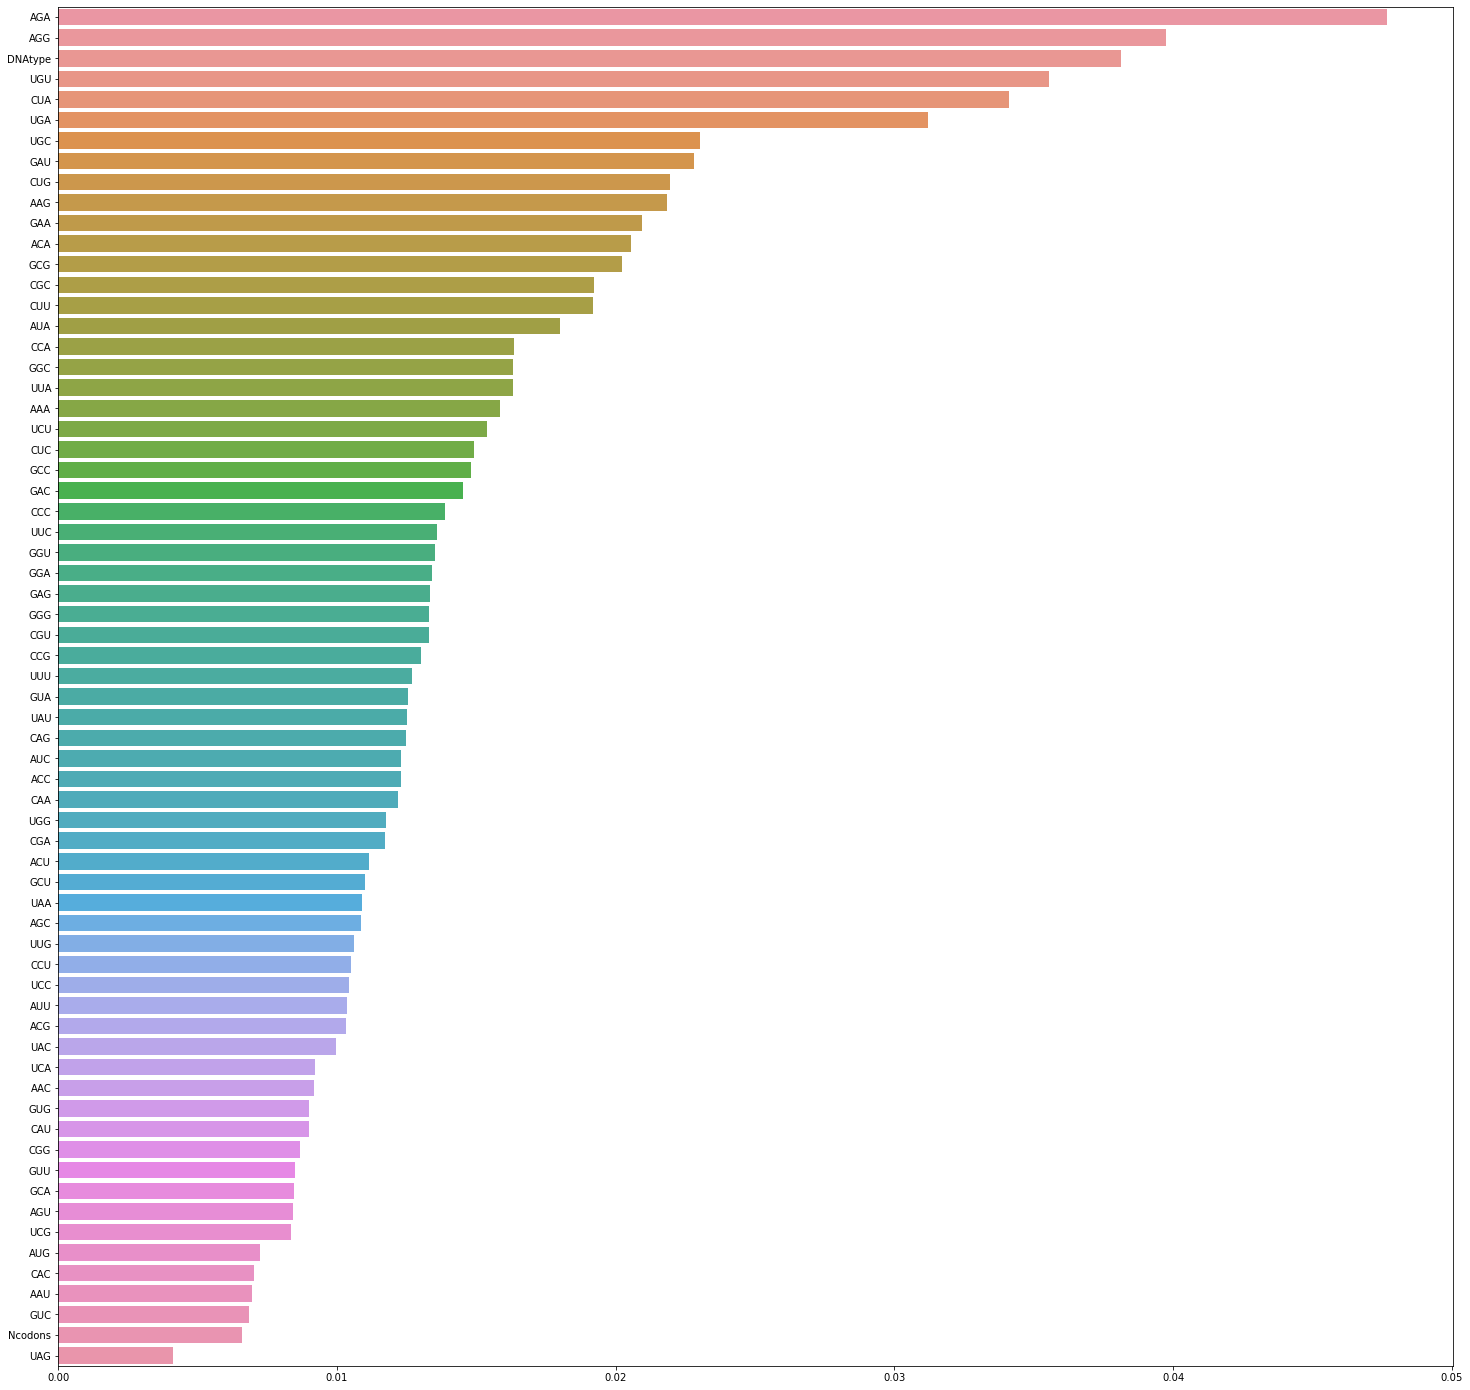

In [52]:
plt.figure(figsize = (25, 25))
sns.barplot(y=importances.index, x=importances, orient="h")

## Сеть

In [53]:
from sklearn.neural_network import MLPClassifier

In [108]:
nn = MLPClassifier(hidden_layer_sizes=(512,256), solver='adam', activation='relu', alpha=1e-5, max_iter=2000, random_state=11)

In [109]:
%%time
nn.fit(X_train, y_train)

print(f'Train score: {nn.score(X_train, y_train)} Test score: {nn.score(X_test, y_test)}')

Train score: 0.9979162096951085 Test score: 0.9273285568065507
Wall time: 2min 39s


In [110]:
nn_predict_test = nn.predict(X_test)

print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, nn_predict_test))

print('Classification report')
print(metrics.classification_report(y_test, nn_predict_test, target_names=class_map.keys()))

Confusion matrix:
[[825   1   4   0   0  13   7   0   2   0   0]
 [  1  23   7   0   0   0   0   0   0   0   0]
 [  3   5 875  12   1   5   9   0   1   0   1]
 [  3   1  18  50   0   1   0   0   0   0   0]
 [  0   0   4   1   2   0   0   0   0   0   0]
 [ 17   1  11   2   0 711  13   0   0   0   0]
 [ 17   0   4   0   0  35 337   8   0   0   0]
 [  3   0   2   0   0   0  13 568   7   3   0]
 [  0   0   0   0   0   0   1   4 151   7   4]
 [  2   0   0   0   0   0   1   1  12  41   1]
 [  1   0   0   0   0   1   0   1   8   4  41]]
Classification report
              precision    recall  f1-score   support

         vrl       0.95      0.97      0.96       852
         arc       0.74      0.74      0.74        31
         bct       0.95      0.96      0.95       912
         phg       0.77      0.68      0.72        73
         plm       0.67      0.29      0.40         7
         pln       0.93      0.94      0.93       755
         inv       0.88      0.84      0.86       401
         

## Подбор гиперпараметров

In [113]:
from sklearn.metrics import accuracy_score

In [116]:
alpha_arr = np.logspace(-5, 1, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    nn = MLPClassifier(hidden_layer_sizes=(512,256), solver='adam', activation='relu', alpha=alpha, max_iter=2000, random_state=11)
    nn.fit(X_train, y_train)

    nn_pred_train = nn.predict(X_train)
    nn_pred_test = nn.predict(X_test)
    
    train_err.append(np.mean(y_train != nn_pred_train))
    test_err.append(np.mean(y_test != nn_pred_test))
    train_acc.append(accuracy_score(y_train, nn_pred_train))
    test_acc.append(accuracy_score(y_test, nn_pred_test))

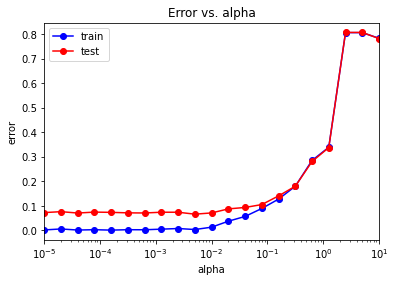

In [118]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

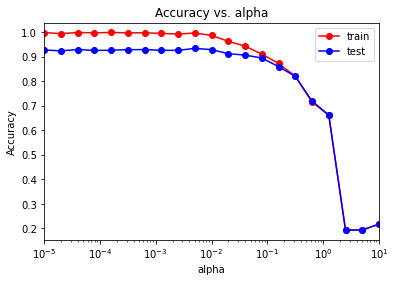

In [119]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0013160780872998464 0.06627430910951894


In [121]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00501187]


In [122]:
alpha_opt = alpha_opt[0]

In [125]:
nn = MLPClassifier(hidden_layer_sizes=(512,256), solver='adam', activation='relu', alpha=alpha_opt, max_iter=2000, random_state=11)
nn.fit(X_train, y_train)
print(f'Train score: {nn.score(X_train, y_train)} Test score: {nn.score(X_test, y_test)}')

Train score: 0.9862908532572933 Test score: 0.9288638689866939


In [126]:
nn_pred_train = nn.predict(X_train)
nn_pred_test = nn.predict(X_test)
print(np.mean(y_train != nn_pred_train))
print(np.mean(y_test != nn_pred_test))

0.013709146742706733
0.07113613101330604


In [129]:
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, nn_pred_test))

Confusion matrix:
[[825   0   3   0   0  15   5   3   0   0   1]
 [  2  21   8   0   0   0   0   0   0   0   0]
 [  8   4 877   8   0   6   7   0   1   1   0]
 [  4   0  16  52   0   1   0   0   0   0   0]
 [  0   0   5   2   0   0   0   0   0   0   0]
 [ 17   1   8   1   0 714  13   1   0   0   0]
 [ 14   0   3   0   0  35 331  18   0   0   0]
 [  3   0   1   0   0   2   8 580   0   1   1]
 [  0   0   0   0   0   1   1   5 137  13  10]
 [  1   0   0   0   0   0   0   3   5  47   2]
 [  1   0   0   0   0   1   0   2   3   3  46]]


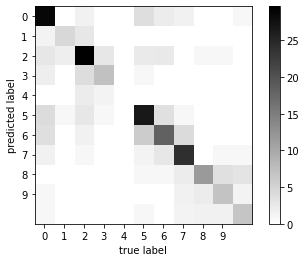

In [131]:
cm = metrics.confusion_matrix(y_test, nn_pred_test)
cm = np.sqrt(cm)
plt.imshow(cm, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()

In [132]:
print('Classification report')
print(metrics.classification_report(y_test, nn_pred_test, target_names=class_map.keys()))

Classification report
              precision    recall  f1-score   support

         vrl       0.94      0.97      0.96       852
         arc       0.81      0.68      0.74        31
         bct       0.95      0.96      0.96       912
         phg       0.83      0.71      0.76        73
         plm       0.00      0.00      0.00         7
         pln       0.92      0.95      0.93       755
         inv       0.91      0.83      0.86       401
         vrt       0.95      0.97      0.96       596
         mam       0.94      0.82      0.88       167
         rod       0.72      0.81      0.76        58
         pri       0.77      0.82      0.79        56

    accuracy                           0.93      3908
   macro avg       0.79      0.77      0.78      3908
weighted avg       0.93      0.93      0.93      3908



C:\Users\Owl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Вывод

В процессе работы я изучил датасет, визуализировал его содержимое различными способами, избавился от ошибок в данных, нормализовал значения и использовал два алгоритма машинного обучения с учителем для тренировки моделей. Мною была произведена оценка точности получившихся моделей с помощью метрик из библиотеки scikit-learn. Наилучший результат был получен с использованием классификатора k ближайших соседей c числом соседей равным 3 и составил 91%. Классификатор случайный лес при использовании всех доступных признаков показал себя немного хуже, точность составила 90% при числе деревьев равном 150. Нормализация данных в датасете значительно повышает точность классификации у обоих алгоритмов.